# 회귀 트리
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것.
- 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산

![image](https://cdn-images-1.medium.com/max/1600/1*yKxIOatPakfHvYMapbYVew.png)

# Examle : Boston House Price prediction
## randomforest

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['price'] = boston.target

y_target = boston_df['price']
X_data = boston_df.drop(['price'], axis = 1)

In [4]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000, n_jobs = -1)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 fold cv RMSE scores : ', np.round(rmse_scores,2))
print('5 fold average RMSE : {0:.3f}'.format(avg_rmse))

5 fold cv RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
5 fold average RMSE : 4.420


In [11]:
def get_model_cv_predict(model, X_data, y_target) :
    
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('#####', model.__class__.__name__, '#####')
    print('5 fold average RMSE : {0:.3f}'.format(avg_rmse))

## other tree regression models

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt = DecisionTreeRegressor(random_state = 0, max_depth=4)
gb = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb = XGBRegressor(n_estimators=1000, n_jobs = -1)
lgb = LGBMRegressor(n_estimators=1000, n_jobs = -1)

models = [dt,rf,gb,xgb,lgb]

for model in models :
    get_model_cv_predict(model, X_data, y_target)


##### DecisionTreeRegressor #####
5 fold average RMSE : 5.978
##### RandomForestRegressor #####
5 fold average RMSE : 4.420
##### GradientBoostingRegressor #####
5 fold average RMSE : 4.272
##### XGBRegressor #####
5 fold average RMSE : 4.089
##### LGBMRegressor #####
5 fold average RMSE : 4.646


## Importance plot

In [13]:
import seaborn as sns
%matplotlib inline

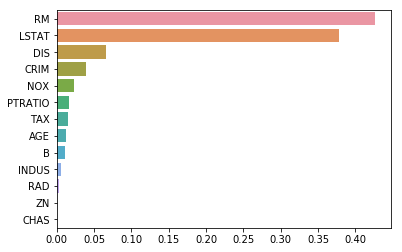

In [14]:
rf.fit(X_data, y_target)

feature_series = pd.Series(data = rf.feature_importances_, index = X_data.columns).sort_values(ascending=False)
sns.barplot(feature_series, feature_series.index)

## Regression_tree  & linear regression
- 가장 중요 변수인 RM칼럼만 이용
- max_depth 의 크기를 변화시키면서 어떻게 회귀 트리 예측선이 변하는지
- 100개만 샘플링하여 분석

In [15]:
boston_sample = boston_df[['RM','price']].sample(100, random_state = 0)
boston_sample.shape


(100, 2)

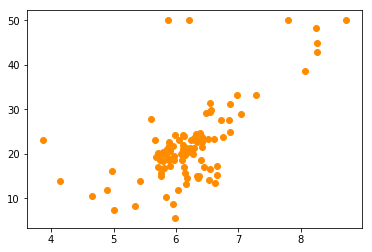

In [17]:
import matplotlib.pyplot as plt
plt.scatter(boston_sample.RM, boston_sample.price, c = 'darkorange')

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
dt2 = DecisionTreeRegressor(max_depth=2)
dt7 = DecisionTreeRegressor(max_depth=7)

#test data
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature = boston_sample['RM'].values.reshape(-1,1)
y_target = boston_sample['price'].values.reshape(-1,1)

In [28]:
lr.fit(X_feature, y_target)
dt2.fit(X_feature, y_target)
dt7.fit(X_feature, y_target)

pred_lr = lr.predict(X_test)
pred_dt2 = dt2.predict(X_test)
pred_dt7 = dt7.predict(X_test)

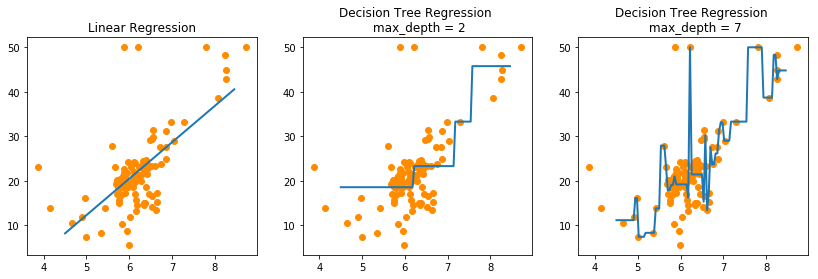

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14,4), ncols = 3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_sample.RM, boston_sample.price, c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

ax2.set_title('Decision Tree Regression \n max_depth = 2')
ax2.scatter(boston_sample.RM, boston_sample.price, c = 'darkorange')
ax2.plot(X_test, pred_dt2, label = 'max_depth 2', linewidth = 2)

ax3.set_title('Decision Tree Regression \n max_depth = 7')
ax3.scatter(boston_sample.RM, boston_sample.price, c = 'darkorange')
ax3.plot(X_test, pred_dt7, label = 'max_depth 7', linewidth = 2)